<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №6

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [13]:
import io
import requests
import ssl
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np

**1. Загрузить датасет**

In [14]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [15]:
dataset.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Нет пропущенных значений.

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

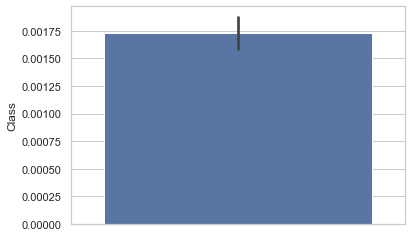

In [17]:
import seaborn as sns
sns.set(style = "whitegrid")
barplt = sns.barplot(y = dataset.Class)

In [18]:
# Количество элементов для класса 0 (честные сделки)
dataset[dataset.Class == 0]['Class'].count()

284315

In [19]:
# Количество элементов для класса 1 (нечестные сделки)
dataset[dataset.Class == 1]['Class'].count()

492

In [20]:
dataset[dataset.Class == 1]['Class'].count() / len(dataset)

0.001727485630620034

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [21]:
# Сумма денег в честных операциях
dataset[dataset.Class == 0]['Amount'].sum()

25102462.04

In [22]:
# Сумма денег в нечестных операциях
dataset[dataset.Class == 1]['Amount'].sum()

60127.97

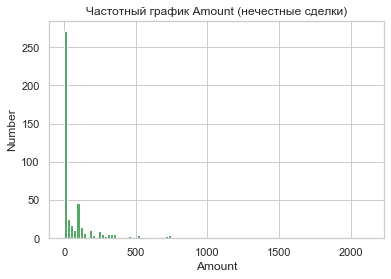

In [23]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(dataset[dataset.Class == 1]['Amount'], 100, facecolor='g')

plt.xlabel('Amount')
plt.ylabel('Number')
plt.title('Частотный график Amount (нечестные сделки)')
plt.grid(True)
plt.show()

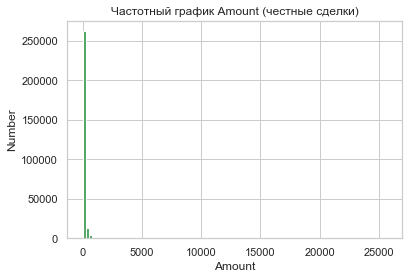

In [24]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(dataset[dataset.Class == 0]['Amount'], 100, facecolor='g')

plt.xlabel('Amount')
plt.ylabel('Number')
plt.title('Частотный график Amount (честные сделки)')
plt.grid(True)
plt.show()

**5. Построить графики histograms для всех значений**

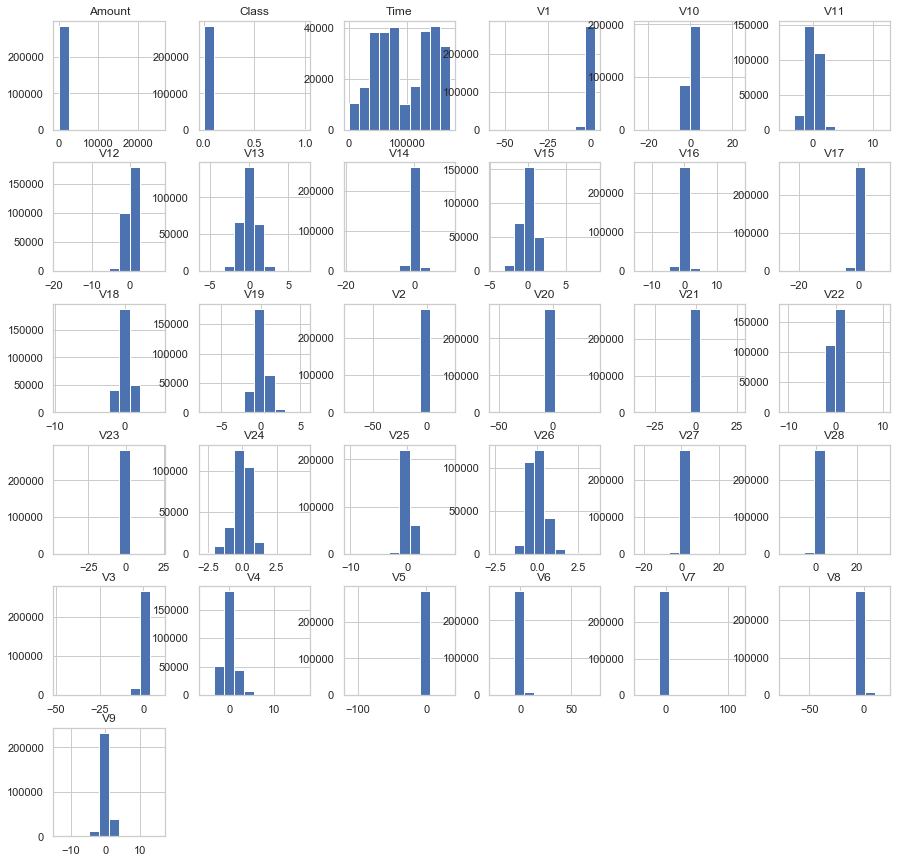

In [25]:
dataset.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

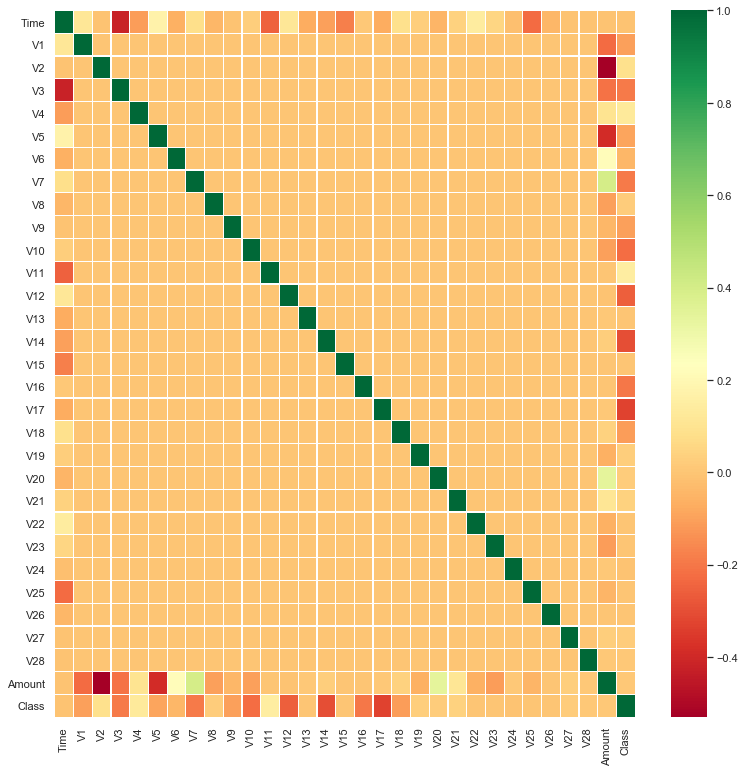

In [26]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(dataset.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

In [27]:
x = dataset.iloc[:, :30]
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [28]:
y = dataset.Class
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Модель Random Forest

In [30]:
%%time
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model = RandomForestClassifier(n_estimators = 100)

# обучаем модель
model.fit(x_train,y_train)

Wall time: 4min 4s


RandomForestClassifier()

No handles with labels found to put in legend.


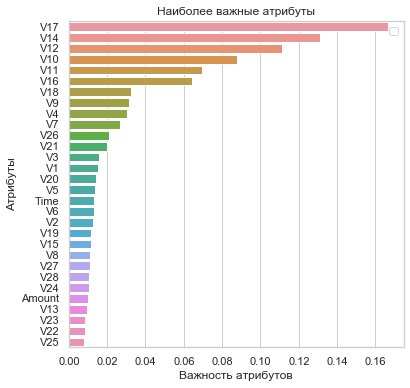

In [31]:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Как делать classification report:

In [32]:
from sklearn.metrics import classification_report
model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.79      0.86        99

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



0.9995611109160493

Построение модели на основе переменных, влияющих наибольшим образом (6 атрибутов).

In [33]:
x = dataset[['V17', 'V14', 'V12', 'V10', 'V16', 'V11']]
x

,V17,V14,V12,V10,V16,V11
0,0.207971,-0.311169,-0.617801,0.090794,-0.470401,-0.551600
1,-0.114805,-0.143772,1.065235,-0.166974,0.463917,1.612727
2,1.109969,-0.165946,0.066084,0.207643,-2.890083,0.624501
3,-0.684093,-0.287924,0.178228,-0.054952,-1.059647,-0.226487
4,-0.237033,-1.119670,0.538196,0.753074,-0.451449,-0.822843
...,...,...,...,...,...,...
284802,1.991691,4.626942,2.711941,4.356170,1.107641,-1.593105
284803,-0.025693,-0.675143,0.915802,-0.975926,-0.711757,-0.150189
284804,0.313502,-0.510602,0.063119,-0.484782,0.140716,0.411614
284805,0.509928,0.449624,-0.962886,-0.399126,-0.608577,-1.933849


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [35]:
%%time
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model = RandomForestClassifier(n_estimators = 100)

# обучаем модель
model.fit(x_train,y_train)

Wall time: 1min 32s


RandomForestClassifier()

In [36]:
model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.97      0.77      0.86        96

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



0.9995786664794073

Построение модели на основе переменных, влияющих наибольшим образом (3 атрибута).

In [37]:
x = dataset[['V17', 'V14', 'V12']]
x

,V17,V14,V12
0,0.207971,-0.311169,-0.617801
1,-0.114805,-0.143772,1.065235
2,1.109969,-0.165946,0.066084
3,-0.684093,-0.287924,0.178228
4,-0.237033,-1.119670,0.538196
...,...,...,...
284802,1.991691,4.626942,2.711941
284803,-0.025693,-0.675143,0.915802
284804,0.313502,-0.510602,0.063119
284805,0.509928,0.449624,-0.962886


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [39]:
%%time
# создаем модель деревья решений
model = RandomForestClassifier(n_estimators = 100)

# обучаем модель
model.fit(x_train,y_train)

Wall time: 49.7 s


RandomForestClassifier()

In [40]:
model_pred = model.predict(x_test)
print(classification_report(y_test, model_pred))
model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.80      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



0.9995084442259752

Построение модели на основе переменных, влияющих наибольшим образом (1 атрибут).

In [41]:
x = dataset[['V17', 'V14']]
x

,V17,V14
0,0.207971,-0.311169
1,-0.114805,-0.143772
2,1.109969,-0.165946
3,-0.684093,-0.287924
4,-0.237033,-1.119670
...,...,...
284802,1.991691,4.626942
284803,-0.025693,-0.675143
284804,0.313502,-0.510602
284805,0.509928,0.449624


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [43]:
%%time
# создаем модель деревья решений
model = RandomForestClassifier(n_estimators = 100)

# обучаем модель
model.fit(x_train,y_train)

Wall time: 53.5 s


RandomForestClassifier()

In [44]:
model_pred = model.predict(x_test)
print(classification_report(y_test, model_pred))
model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.87      0.71      0.78       112

    accuracy                           1.00     56962
   macro avg       0.93      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



0.9992099996488887

Поварьируем-ка мы количество деревьев...

In [45]:
%%time
# создаем модель деревья решений
model = RandomForestClassifier(n_estimators = 20)

# обучаем модель
model.fit(x_train,y_train)

model_pred = model.predict(x_test)
print(classification_report(y_test, model_pred))
model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.90      0.70      0.78       112

    accuracy                           1.00     56962
   macro avg       0.95      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Wall time: 10.9 s


0.9992451107756047

In [46]:
%%time
# создаем модель деревья решений
model = RandomForestClassifier(n_estimators = 10)

# обучаем модель
model.fit(x_train,y_train)

model_pred = model.predict(x_test)
print(classification_report(y_test, model_pred))
model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.89      0.68      0.77       112

    accuracy                           1.00     56962
   macro avg       0.95      0.84      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Wall time: 5.56 s


0.9992099996488887

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [47]:
from sklearn import preprocessing
x = dataset.iloc[:, :30]
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.165884,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.159060,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.171710,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.156100,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.169231,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [49]:
%%time
# создаем модель деревья решений
model = RandomForestClassifier(n_estimators = 100)

# обучаем модель
model.fit(x_train,y_train)

Wall time: 3min 53s


RandomForestClassifier()

In [50]:
model_pred = model.predict(x_test)
print(classification_report(y_test, model_pred))
model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.93      0.76      0.84       112

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



0.999420666409185

Все характеристики возросли на 0,01, следовательно, в данном случае нормализация не играет существенной роли.

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [51]:
print('Количество элементов в исходном наборе данных', len(dataset))

Количество элементов в исходном наборе данных 284807


In [52]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(x_train, y_train)
x_resampled, y_resampled = ros.fit_sample(x_train, y_train)
print('Количество элементов до операции:', len(x_train))
print('Количество элементов после операции:', len(x_resampled))

Количество элементов до операции: 227845
Количество элементов после операции: 454930


In [53]:
%%time
# создаем модель деревья решений
model = RandomForestClassifier(n_estimators = 100)

# обучаем модель
model.fit(x_resampled, y_resampled)

Wall time: 3min 16s


RandomForestClassifier()

In [54]:
model_pred = model.predict(x_test)
print(classification_report(y_test, model_pred))
model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.93      0.77      0.84       112

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



0.9994382219725431

Точностные характеристики модели не улучшились.

Попытка создания модели с высокой скоростью обучения с помощью:
* субдискретизации (undersampling)
* уменьшения количества переменных до 3
* уменьшения количества деревьев в ансамбле классификаторов до 40

In [55]:
rus = RandomUnderSampler(random_state = 0)
rus.fit(x_train, y_train)
x_undersampled, y_undersampled = rus.fit_sample(x_train, y_train)
print('Количество элементов до операции:', len(x_train))
print('Количество элементов после операции:', len(x_undersampled))

Количество элементов до операции: 227845
Количество элементов после операции: 760


In [57]:
x_undersampled_3V = x_undersampled[['V17', 'V14', 'V12']]
x_undersampled_3V.head()

,V17,V14,V12
0,-0.109476,0.883809,-2.419215
1,-0.731940,0.231437,0.446853
2,-0.122646,1.650187,-2.227758
3,-0.444564,0.279665,0.646679
4,-0.113467,0.496481,0.088033


In [66]:
x_test_3V = x_test[['V17', 'V14', 'V12']]
x_test_3V.head()

,V17,V14,V12
68598,1.371441,-0.019996,-0.249338
146747,-0.470358,0.065621,0.246522
116393,1.360749,-0.174557,1.123491
267010,-0.569656,0.305485,1.370465
219986,-0.389104,0.847880,0.783375


In [67]:
%%time
# создаем модель деревья решений
model = RandomForestClassifier(n_estimators = 40)

# обучаем модель
model.fit(x_undersampled_3V, y_undersampled)

Wall time: 97.8 ms


RandomForestClassifier(n_estimators=40)

In [68]:
model_pred = model.predict(x_test_3V)
print(classification_report(y_test, model_pred))
model.score(x_test_3V, y_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56850
           1       0.03      0.91      0.07       112

    accuracy                           0.95     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.95      0.97     56962



0.9496506442891752

Точностные характеристики модели стали существенно хуже.
Вероятнее всего, к этому привело сокращение обучающей выборки.